In [10]:
import sqlite3
from astroquery.simbad import Simbad
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt

### Query Configuration

In [21]:
Simbad.reset_votable_fields() # reset the fields to the default
Simbad.add_votable_fields("plx")   # add the parallax field
Simbad.add_votable_fields("flux(V)")  # add the V band flux field

### Stars List

In [34]:
stars = [
    "Betelgeuse",
    "Sirius A",
    "Alpha Centauri A",
    "Procyon A",
    "Rigel",
    "Aldebaran",
    "Antares",
    "Deneb",
    "Vega",
    "Castor A",
    "Pollux",
    "Arcturus",
    "Altair",
    "Capella A",
    "Aldebaran",
    "Fomalhaut",
    "Spica",
    "Mirfak",
    "Sirius B",
    "Canopus"
]

### Query 3 stars to a database using Astroquery

In [35]:
query = Simbad.query_objects(stars)
print(query)
print(query.colnames)

  MAIN_ID         RA           DEC      ... PLX_VALUE FLUX_V SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"    ...    mas     mag                   
----------- ------------- ------------- ... --------- ------ ----------------
  * alf Ori 05 55 10.3053 +07 24 25.430 ...     6.550   0.42                1
  * alf CMa 06 45 08.9172 -16 42 58.017 ...   379.210  -1.46                2
* alf Cen A 14 39 36.4940 -60 50 02.373 ...   742.120   0.01                3
  * alf CMi 07 39 18.1195 +05 13 29.955 ...   284.560   0.37                4
  * bet Ori 05 14 32.2721 -08 12 05.898 ...     3.780   0.13                5
  * alf Tau 04 35 55.2390 +16 30 33.488 ...    48.940   0.86                6
  * alf Sco 16 29 24.4597 -26 25 55.209 ...     5.890   0.91                7
  * alf Cyg 20 41 25.9151 +45 16 49.219 ...     2.310   1.25                8
  * alf Lyr 18 36 56.3363 +38 47 01.280 ...   130.230   0.03                9
* alf Gem A 07 34 35.8628 +31 53 17.794 ...        --    1.9    

/Users/nicolascampos/Library/Python/3.9/lib/python/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 16 raised an error (recorded in the `errors` attribute of the result table): 'Capella A' this identifier has an incorrect format for catalog: 	C : Cluster
  warnings.warn("Warning: The script line number %i raised "


### Filter the stars with magnitude below 5

In [36]:
magnitude_filter = query["FLUX_V"] < 5  # filter out stars with V band magnitude greater than 5
filtered_stars = query[magnitude_filter]    # apply the filter
print(filtered_stars)   # print the filtered table

  MAIN_ID         RA           DEC      ... PLX_VALUE FLUX_V SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"    ...    mas     mag                   
----------- ------------- ------------- ... --------- ------ ----------------
  * alf Ori 05 55 10.3053 +07 24 25.430 ...     6.550   0.42                1
  * alf CMa 06 45 08.9172 -16 42 58.017 ...   379.210  -1.46                2
* alf Cen A 14 39 36.4940 -60 50 02.373 ...   742.120   0.01                3
  * alf CMi 07 39 18.1195 +05 13 29.955 ...   284.560   0.37                4
  * bet Ori 05 14 32.2721 -08 12 05.898 ...     3.780   0.13                5
  * alf Tau 04 35 55.2390 +16 30 33.488 ...    48.940   0.86                6
  * alf Sco 16 29 24.4597 -26 25 55.209 ...     5.890   0.91                7
  * alf Cyg 20 41 25.9151 +45 16 49.219 ...     2.310   1.25                8
  * alf Lyr 18 36 56.3363 +38 47 01.280 ...   130.230   0.03                9
* alf Gem A 07 34 35.8628 +31 53 17.794 ...        --    1.9    

### Create a dataframe with the stars data

In [37]:
df = filtered_stars.to_pandas() # convert the table to a pandas dataframe
print(df)

        MAIN_ID             RA            DEC  RA_PREC  DEC_PREC  \
0     * alf Ori  05 55 10.3053  +07 24 25.430        9         9   
1     * alf CMa  06 45 08.9172  -16 42 58.017        9         9   
2   * alf Cen A  14 39 36.4940  -60 50 02.373        9         9   
3     * alf CMi  07 39 18.1195  +05 13 29.955        9         9   
4     * bet Ori  05 14 32.2721  -08 12 05.898        9         9   
5     * alf Tau  04 35 55.2390  +16 30 33.488        9         9   
6     * alf Sco  16 29 24.4597  -26 25 55.209        9         9   
7     * alf Cyg  20 41 25.9151  +45 16 49.219        9         9   
8     * alf Lyr  18 36 56.3363  +38 47 01.280        9         9   
9   * alf Gem A  07 34 35.8628  +31 53 17.794       10        10   
10    * bet Gem  07 45 18.9498  +28 01 34.316        9         9   
11    * alf Boo  14 15 39.6720  +19 10 56.673        9         9   
12    * alf Aql  19 50 46.9985  +08 52 05.956        9         9   
13    * alf Tau  04 35 55.2390  +16 30 33.488   

### Mean Distance

In [38]:
mean_plx = df["PLX_VALUE"].mean()  # calculate the mean parallax
print(f"Mean Distance: {mean_plx:.2f} parsecs")

Mean Distance: 128.98 parsecs


### Plot the data

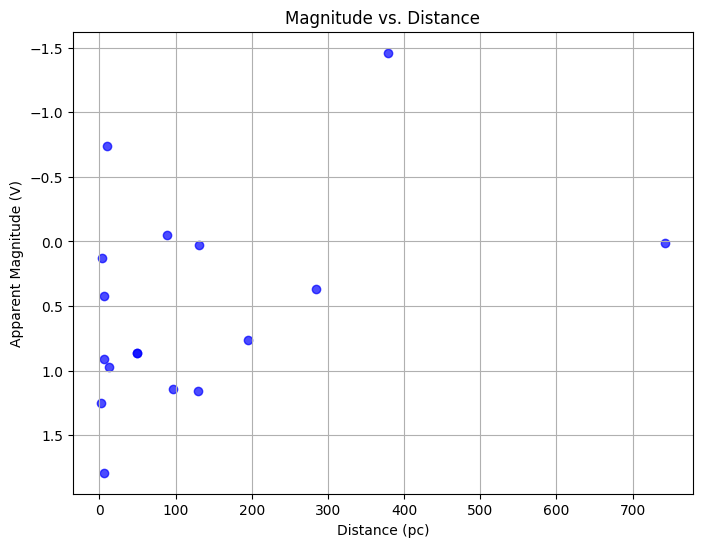

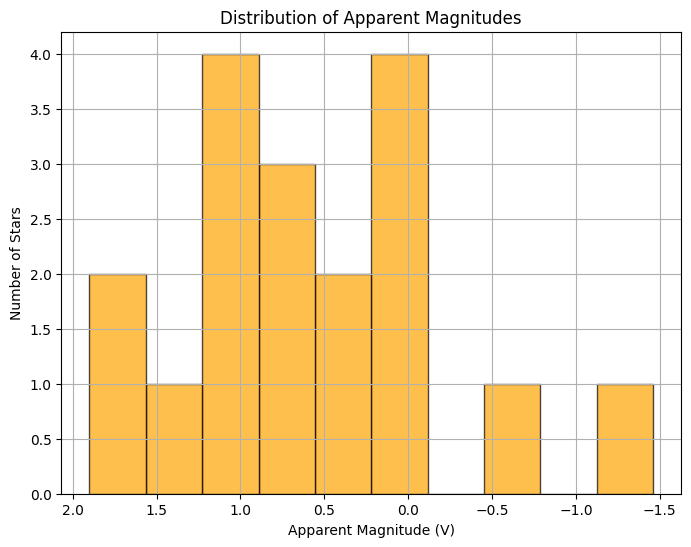

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(df['PLX_VALUE'], df['FLUX_V'], color='blue', alpha=0.7)
plt.xlabel('Distance (pc)')
plt.ylabel('Apparent Magnitude (V)')
plt.title('Magnitude vs. Distance')
plt.gca().invert_yaxis()  # Invertimos el eje Y, ya que una magnitud más baja es más brillante
plt.grid()
plt.show()

# Histograma de distribución de magnitudes
plt.figure(figsize=(8, 6))
plt.hist(df['FLUX_V'], bins=10, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('Apparent Magnitude (V)')
plt.ylabel('Number of Stars')
plt.title('Distribution of Apparent Magnitudes')
plt.gca().invert_xaxis()
plt.grid()
plt.show()